In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('currently_best_model_match_predictions.csv')
matches = pd.read_csv('../../../preprocessing/data/matches.csv') 
df = df.merge(matches, on='match_id', how='left')
preds = df['model_prediction']
targets = df['true_label']
binary_preds = [1 if p >= 0.5 else 0 for p in preds]
odds_preds = df['odds_prediction']
binary_odds_preds = [1 if p >= 0.5 else 0 for p in odds_preds]

avgW = df['AvgW']
avgL = df['AvgL']
date = df['Date']



In [13]:
condition = (df['winner_rank'] < 50) & (df['loser_rank'] < 50)  & (df['uncertain'] == False)
filtered_preds = preds[condition]
filtered_targets = targets[condition]
filtered_odds = odds_preds[condition]
filtered_binary_preds = [1 if p >= 0.5 else 0 for p in preds[condition]]
filtered_binary_odds_preds = [1 if p >= 0.5 else 0 for p in odds_preds[condition]]

filtered_avgW = avgW[condition]
filtered_avgL = avgL[condition]
filtered_date = date[condition]

In [4]:
df[condition]

,match_id,true_label,model_prediction,odds_prediction,uncertain,tournament_location,tournament_name,Date,tournament_level,indoor_or_outdoor,...,loser_rank_points,time,winner_entry_LL,winner_entry_Q,winner_entry_WC,loser_entry_LL,loser_entry_Q,loser_entry_WC,winner_is_seeded,loser_is_seeded
7,Adelaide 1_2023_106415_208029,0.0,0.815094,0.734021,False,Adelaide 1,Adelaide International 1,2023-01-02,ATP250,Outdoor,...,2888.0,05:15,False,False,False,False,False,False,0,1
20,Adelaide 1_2023_105138_126094,1.0,0.226316,0.350120,False,Adelaide 1,Adelaide International 1,2023-01-03,ATP250,Outdoor,...,3930.0,09:10,False,False,False,False,False,False,0,1
21,Adelaide 1_2023_200624_104918,0.0,0.306985,0.401015,False,Adelaide 1,Adelaide International 1,2023-01-03,ATP250,Outdoor,...,920.0,10:30,False,False,False,False,False,False,0,0
24,Adelaide 1_2023_106421_132283,1.0,0.871252,0.845942,False,Adelaide 1,Adelaide International 1,2023-01-03,ATP250,Outdoor,...,950.0,01:40,False,False,False,False,False,False,1,0
29,Adelaide 1_2023_111575_207733,1.0,0.609417,0.420103,False,Adelaide 1,Adelaide International 1,2023-01-04,ATP250,Outdoor,...,990.0,01:45,False,False,False,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,Paris 2_2023_104925_208029,0.0,0.155536,0.261134,False,Paris 2,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,...,4280.0,19:45,False,False,False,False,False,False,1,1
2630,Paris 2_2023_126774_111575,1.0,0.522461,0.609023,False,Paris 2,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,...,2385.0,16:15,False,False,False,False,False,False,1,1
2631,Paris 2_2023_105777_126774,1.0,0.461055,0.436693,False,Paris 2,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,...,4435.0,14:10,False,False,False,False,False,False,0,1
2632,Paris 2_2023_104925_126094,1.0,0.842144,0.698448,False,Paris 2,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,...,4935.0,17:15,False,False,False,False,False,False,1,1


In [7]:
from sklearn.metrics import log_loss, brier_score_loss, accuracy_score

print(f'accuracy model: {accuracy_score(targets, binary_preds)}')
print(f'accuracy bukmakers: {accuracy_score(targets, binary_odds_preds)}')
print(f'log loss model: {log_loss(targets, preds)}')
print(f'log loss bukmakers: {log_loss(targets, odds_preds)}')
print(f'brier score model: {brier_score_loss(targets, preds)}')
print(f'brier score bukmakers: {brier_score_loss(targets, odds_preds)}')


print(f'accuracy model: {accuracy_score(filtered_targets, filtered_binary_preds)}')
print(f'accuracy bukmakers: {accuracy_score(filtered_targets, filtered_binary_odds_preds)}')
print(f'log loss model: {log_loss(filtered_targets, filtered_preds)}')
print(f'log loss bukmakers: {log_loss(filtered_targets, filtered_odds)}')
print(f'brier score model: {brier_score_loss(filtered_targets, filtered_preds)}')
print(f'brier score bukmakers: {brier_score_loss(filtered_targets, filtered_odds)}')

accuracy model: 0.6495535714285714
accuracy bukmakers: 0.671875
log loss model: 0.6190624223562784
log loss bukmakers: 0.5904810043765634
brier score model: 0.21620899001757016
brier score bukmakers: 0.20384560388946865
accuracy model: 0.6888888888888889
accuracy bukmakers: 0.6944444444444444
log loss model: 0.5724499772098002
log loss bukmakers: 0.5662540302157842
brier score model: 0.1961648793348825
brier score bukmakers: 0.19295585339263385


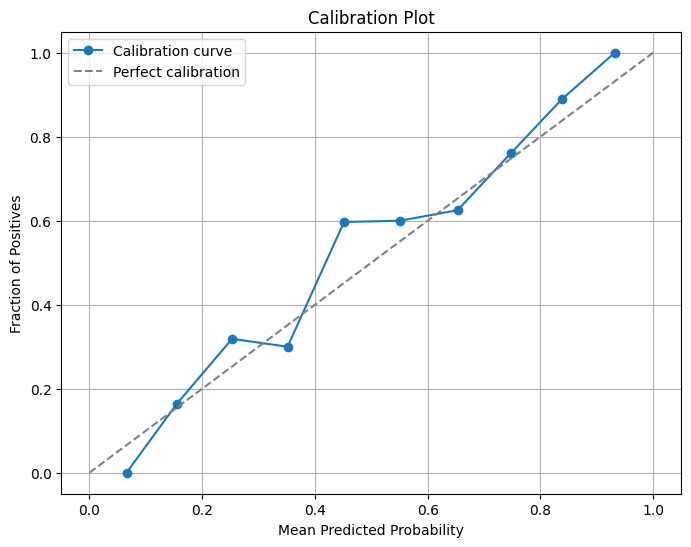

In [6]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
prob_true, prob_pred = calibration_curve(filtered_targets, filtered_preds, n_bins=10, strategy="uniform")

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label="Calibration curve")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect calibration", color="gray")
plt.title("Calibration Plot")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend(loc="upper left")
plt.grid()
plt.show()

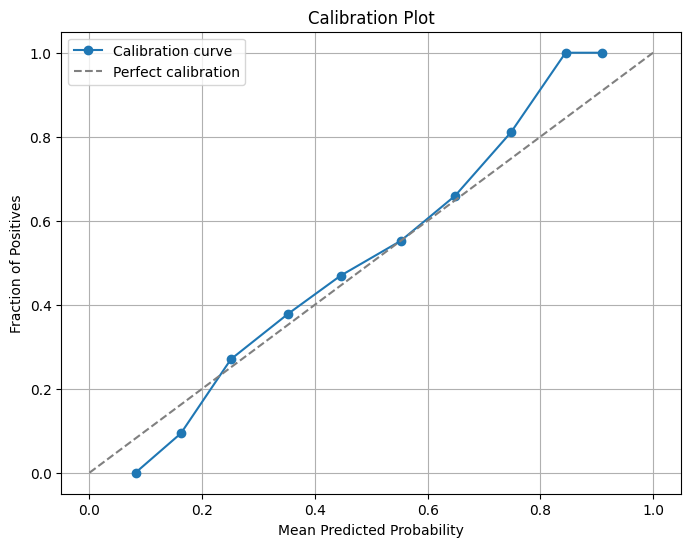

In [7]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
prob_true, prob_pred = calibration_curve(filtered_targets, filtered_odds, n_bins=10, strategy="uniform")

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label="Calibration curve")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect calibration", color="gray")
plt.title("Calibration Plot")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend(loc="upper left")
plt.grid()
plt.show()

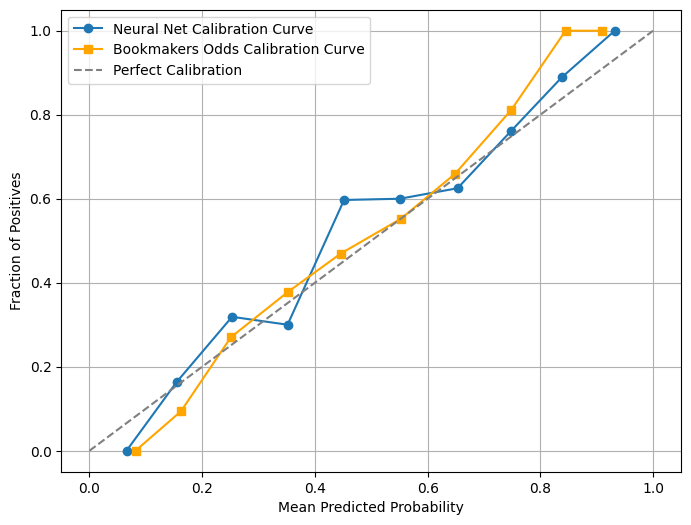

In [11]:
prob_true_1, prob_pred_1 = calibration_curve(filtered_targets, filtered_preds, n_bins=10, strategy="uniform")
prob_true_2, prob_pred_2 = calibration_curve(filtered_targets, filtered_odds, n_bins=10, strategy="uniform")

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_1, prob_true_1, marker='o', label="Neural Net Calibration Curve")
plt.plot(prob_pred_2, prob_true_2, marker='s', label="Bookmakers Odds Calibration Curve", color="orange")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect Calibration", color="gray")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend(loc="upper left")
plt.grid()
plt.savefig('calibration_plot_neural_net.pdf', format='pdf')
plt.show()

In [29]:
def kelly_criterion(p, odds):
    b = odds - 1
    kelly_fraction = (p * (b + 1) - 1) / b
    return max(0, kelly_fraction)

def calculate_roi(predictions, outcomes, avgW, avgL, dates, initial_bankroll=1000):
    bankroll = initial_bankroll
    bankroll_over_time = [bankroll]
    bankroll_by_date = {dates[0]: bankroll}
    total_bet = 0
    counter = 0

    for date, p, outcome, odds_winner, odds_loser in zip(dates, predictions, outcomes, avgW, avgL):
        odds = odds_winner if outcome == 1 else odds_loser

        bet_fraction = kelly_criterion(p, odds)
        if bet_fraction >0:
            counter+=1
        max_bet_amount = 200
        bet_amount = min(bankroll, max_bet_amount * bet_fraction)
        total_bet += bet_amount

        if outcome == 1:
            bankroll += bet_amount * (odds - 1)
        else:
            bankroll -= bet_amount
        
        bankroll_by_date[date] = bankroll
        bankroll_over_time.append(bankroll)
    print(total_bet, counter)
    net_profit = ((bankroll - initial_bankroll) / initial_bankroll) * 100 if total_bet > 0 else 0
    roi = ((bankroll - initial_bankroll) / total_bet) * 100 if total_bet > 0 else 0
    return net_profit, roi, bankroll_by_date

In [30]:
net_profit, roi, bankroll_by_dates = calculate_roi(filtered_preds, filtered_targets, filtered_avgW, filtered_avgL, list(filtered_date))
print(f"Net profit: {net_profit:.2f}%")
print(f"ROI: {roi:.2f}%")

5257.049828749661 193
Net profit: 29.57%
ROI: 5.62%


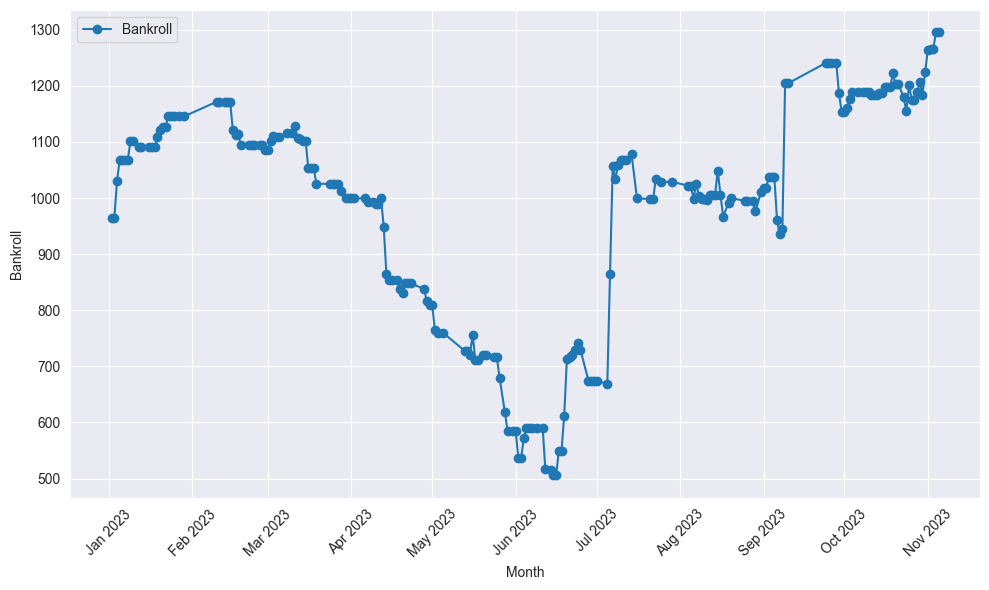

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

dates = list(bankroll_by_dates.keys())
bankroll_values = list(bankroll_by_dates.values())

dates = [pd.to_datetime(date) for date in dates]

plt.plot(dates, bankroll_values, marker='o', label="Bankroll")
plt.xlabel("Month")
plt.ylabel("Bankroll")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.savefig("bankroll_over_time.pdf", format='pdf')
plt.show()
